#**QSAR modeling for topoisomerase II inhibitors using machine learning**
[Part 2]

Creator : Mansi Patel



In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-09-03 13:48:25--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   231MB/s    in 0.4s    

2022-09-03 13:48:25 (231 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

## **Load bioactivity data**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('bioactivity_data_preprocessed.csv')

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Import libraries**

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,364.586,3.18060,1.0,5.0
1,378.613,3.98192,1.0,5.0
2,364.586,3.18060,1.0,5.0
3,639.506,5.05580,2.0,13.0
4,636.506,5.75962,2.0,13.0
...,...,...,...,...
242,476.381,4.80370,2.0,6.0
243,240.214,1.87320,2.0,4.0
244,288.299,2.12040,3.0,5.0
245,543.525,0.00130,6.0,12.0


In [ ]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL115665,O=C1C(Nc2ccc(Br)cc2)=C(Cl)C(=O)c2ncncc21,15100.0,inactive
1,CHEMBL115302,Cc1ccc(/N=C2/C(=O)c3cncnc3C(O)=C2Cl)c(Br)c1,40500.0,inactive
2,CHEMBL325088,O=C1C(Nc2ccccc2Br)=C(Cl)C(=O)c2ncncc21,17300.0,inactive
3,CHEMBL157769,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,60.0,active
4,CHEMBL157831,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,60.0,active
...,...,...,...,...
242,CHEMBL4440907,O=C1c2ccccc2C(=O)c2c(O)c(C(c3ccsc3)N(CCCl)CCCl...,22400.0,intermediate
243,CHEMBL17594,O=C1c2ccccc2C(=O)c2c(O)ccc(O)c21,200000.0,active
244,CHEMBL9470,CC(C)=CC[C@@H](O)C1=CC(=O)c2c(O)ccc(O)c2C1=O,7800.0,active
245,CHEMBL53463,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,3800.0,active


Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL115665,O=C1C(Nc2ccc(Br)cc2)=C(Cl)C(=O)c2ncncc21,15100.0,inactive,364.586,3.18060,1.0,5.0
1,CHEMBL115302,Cc1ccc(/N=C2/C(=O)c3cncnc3C(O)=C2Cl)c(Br)c1,40500.0,inactive,378.613,3.98192,1.0,5.0
2,CHEMBL325088,O=C1C(Nc2ccccc2Br)=C(Cl)C(=O)c2ncncc21,17300.0,inactive,364.586,3.18060,1.0,5.0
3,CHEMBL157769,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,60.0,active,639.506,5.05580,2.0,13.0
4,CHEMBL157831,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,60.0,active,636.506,5.75962,2.0,13.0
...,...,...,...,...,...,...,...,...
242,CHEMBL4440907,O=C1c2ccccc2C(=O)c2c(O)c(C(c3ccsc3)N(CCCl)CCCl...,22400.0,intermediate,476.381,4.80370,2.0,6.0
243,CHEMBL17594,O=C1c2ccccc2C(=O)c2c(O)ccc(O)c21,200000.0,active,240.214,1.87320,2.0,4.0
244,CHEMBL9470,CC(C)=CC[C@@H](O)C1=CC(=O)c2c(O)ccc(O)c2C1=O,7800.0,active,288.299,2.12040,3.0,5.0
245,CHEMBL53463,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,3800.0,active,543.525,0.00130,6.0,12.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

count       247.000000
mean      53249.710121
std      107839.128486
min           3.200000
25%        1500.000000
50%       23000.000000
75%       50000.000000
max      500000.000000
Name: standard_value, dtype: float64

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL115665,O=C1C(Nc2ccc(Br)cc2)=C(Cl)C(=O)c2ncncc21,inactive,364.586,3.18060,1.0,5.0,15100.0
1,CHEMBL115302,Cc1ccc(/N=C2/C(=O)c3cncnc3C(O)=C2Cl)c(Br)c1,inactive,378.613,3.98192,1.0,5.0,40500.0
2,CHEMBL325088,O=C1C(Nc2ccccc2Br)=C(Cl)C(=O)c2ncncc21,inactive,364.586,3.18060,1.0,5.0,17300.0
3,CHEMBL157769,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,639.506,5.05580,2.0,13.0,60.0
4,CHEMBL157831,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,636.506,5.75962,2.0,13.0,60.0
...,...,...,...,...,...,...,...,...
242,CHEMBL4440907,O=C1c2ccccc2C(=O)c2c(O)c(C(c3ccsc3)N(CCCl)CCCl...,intermediate,476.381,4.80370,2.0,6.0,22400.0
243,CHEMBL17594,O=C1c2ccccc2C(=O)c2c(O)ccc(O)c21,active,240.214,1.87320,2.0,4.0,200000.0
244,CHEMBL9470,CC(C)=CC[C@@H](O)C1=CC(=O)c2c(O)ccc(O)c2C1=O,active,288.299,2.12040,3.0,5.0,7800.0
245,CHEMBL53463,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,active,543.525,0.00130,6.0,12.0,3800.0


In [ ]:
df_norm.standard_value_norm.describe()

count       247.000000
mean      53249.710121
std      107839.128486
min           3.200000
25%        1500.000000
50%       23000.000000
75%       50000.000000
max      500000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL115665,O=C1C(Nc2ccc(Br)cc2)=C(Cl)C(=O)c2ncncc21,inactive,364.586,3.18060,1.0,5.0,4.821023
1,CHEMBL115302,Cc1ccc(/N=C2/C(=O)c3cncnc3C(O)=C2Cl)c(Br)c1,inactive,378.613,3.98192,1.0,5.0,4.392545
2,CHEMBL325088,O=C1C(Nc2ccccc2Br)=C(Cl)C(=O)c2ncncc21,inactive,364.586,3.18060,1.0,5.0,4.761954
3,CHEMBL157769,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,639.506,5.05580,2.0,13.0,7.221849
4,CHEMBL157831,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,636.506,5.75962,2.0,13.0,7.221849
...,...,...,...,...,...,...,...,...
242,CHEMBL4440907,O=C1c2ccccc2C(=O)c2c(O)c(C(c3ccsc3)N(CCCl)CCCl...,intermediate,476.381,4.80370,2.0,6.0,4.649752
243,CHEMBL17594,O=C1c2ccccc2C(=O)c2c(O)ccc(O)c21,active,240.214,1.87320,2.0,4.0,3.698970
244,CHEMBL9470,CC(C)=CC[C@@H](O)C1=CC(=O)c2c(O)ccc(O)c2C1=O,active,288.299,2.12040,3.0,5.0,5.107905
245,CHEMBL53463,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,active,543.525,0.00130,6.0,12.0,5.420216


In [ ]:
df_final.pIC50.describe()

count    247.000000
mean       5.070103
std        1.192879
min        3.301030
25%        4.301030
50%        4.638272
75%        5.823909
max        8.494850
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL115665,O=C1C(Nc2ccc(Br)cc2)=C(Cl)C(=O)c2ncncc21,inactive,364.586,3.18060,1.0,5.0,4.821023
1,CHEMBL115302,Cc1ccc(/N=C2/C(=O)c3cncnc3C(O)=C2Cl)c(Br)c1,inactive,378.613,3.98192,1.0,5.0,4.392545
2,CHEMBL325088,O=C1C(Nc2ccccc2Br)=C(Cl)C(=O)c2ncncc21,inactive,364.586,3.18060,1.0,5.0,4.761954
3,CHEMBL157769,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,639.506,5.05580,2.0,13.0,7.221849
4,CHEMBL157831,COC(=O)c1c(Br)c(OC)cc(O)c1CSC[C@H](Nc1nc(-c2cc...,active,636.506,5.75962,2.0,13.0,7.221849
...,...,...,...,...,...,...,...,...
241,CHEMBL4593714,O=C1c2ccccc2C(=O)c2c(O)c(C(c3ccc(OC(F)(F)F)cc3...,inactive,554.348,5.64080,2.0,6.0,4.458421
243,CHEMBL17594,O=C1c2ccccc2C(=O)c2c(O)ccc(O)c21,active,240.214,1.87320,2.0,4.0,3.698970
244,CHEMBL9470,CC(C)=CC[C@@H](O)C1=CC(=O)c2c(O)ccc(O)c2C1=O,active,288.299,2.12040,3.0,5.0,5.107905
245,CHEMBL53463,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,active,543.525,0.00130,6.0,12.0,5.420216


---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

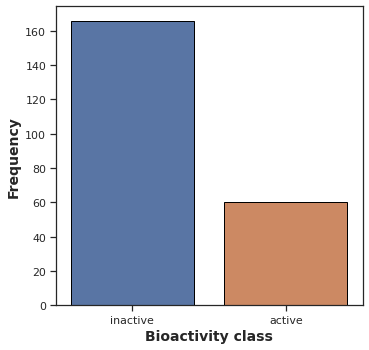

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

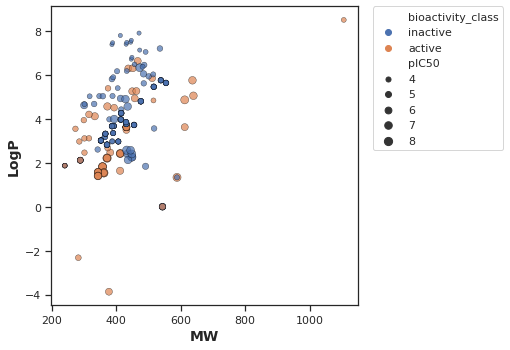

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

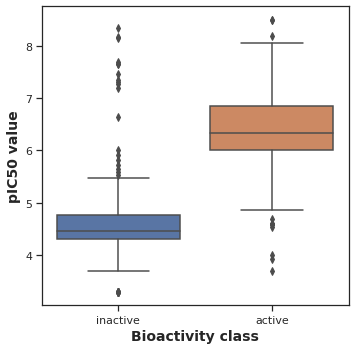

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,8481.0,6.309469e-16,0.05,Different distribution (reject H0)


#### **MW**

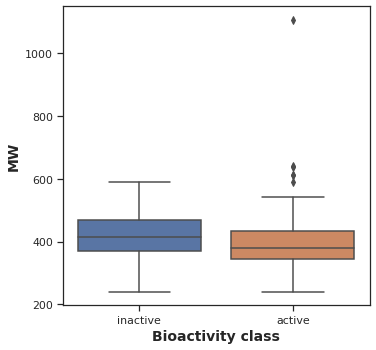

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,4141.5,0.053472,0.05,Same distribution (fail to reject H0)


#### **LogP**

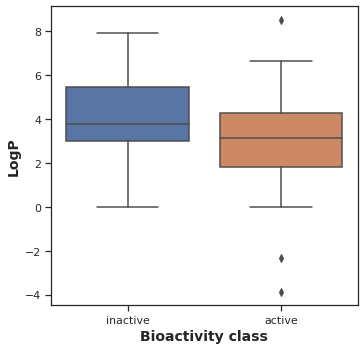

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3367.0,0.000203,0.05,Different distribution (reject H0)


#### **NumHDonors**

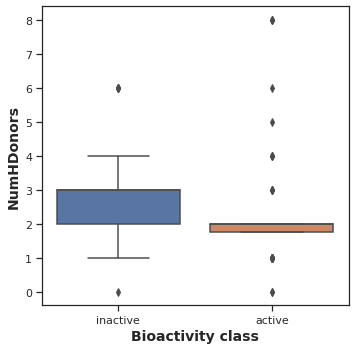

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3381.5,0.000084,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

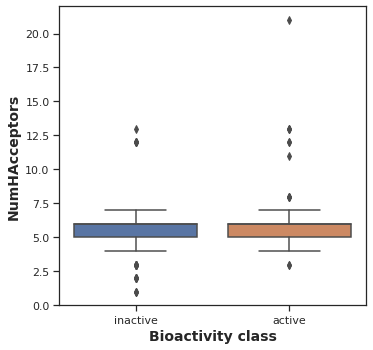

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,5853.0,0.031024,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

updating: mannwhitneyu_NumHAcceptors.csv (deflated 12%)
updating: plot_NumHDonors.pdf (deflated 38%)
updating: mannwhitneyu_NumHDonors.csv (deflated 9%)
updating: plot_MW.pdf (deflated 39%)
updating: plot_bioactivity_class.pdf (deflated 37%)
updating: mannwhitneyu_MW.csv (deflated 9%)
updating: plot_ic50.pdf (deflated 38%)
updating: mannwhitneyu_pIC50.csv (deflated 10%)
updating: bioactivity_data_preprocessed.csv (deflated 86%)
updating: plot_LogP.pdf (deflated 38%)
updating: plot_NumHAcceptors.pdf (deflated 39%)
updating: plot_MW_vs_LogP.pdf (deflated 11%)
updating: mannwhitneyu_LogP.csv (deflated 8%)
